In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house_data = pd.read_csv('data.csv')
house_data.head()

,crime_rate,zone,industry,near_river,pollution_level,rooms,age,city_distance,highway_connection,tax_rate,st_ratio,black_pop,lower_stat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## EDA

In [26]:
house_data.tail()

,crime_rate,zone,industry,near_river,pollution_level,rooms,age,city_distance,highway_connection,tax_rate,st_ratio,black_pop,lower_stat,price
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [27]:
house_data['tax_rate'].unique()

array([296, 242, 222, 311, 307, 279, 252, 233, 243, 469, 226, 313, 256,
       284, 216, 337, 345, 305, 398, 281, 247, 270, 276, 384, 432, 188,
       437, 403, 193, 265, 255, 329, 402, 348, 224, 277, 300, 330, 315,
       244, 264, 223, 254, 198, 285, 241, 293, 245, 289, 358, 304, 287,
       430, 422, 370, 352, 351, 280, 335, 411, 187, 334, 666, 711, 391,
       273], dtype=int64)

In [28]:
house_data.dtypes

crime_rate            float64
zone                  float64
industry              float64
near_river              int64
pollution_level       float64
rooms                 float64
age                   float64
city_distance         float64
highway_connection      int64
tax_rate                int64
st_ratio              float64
black_pop             float64
lower_stat            float64
price                 float64
dtype: object

In [29]:
house_data.shape

(506, 14)

In [30]:
house_data.describe(include='all')

,crime_rate,zone,industry,near_river,pollution_level,rooms,age,city_distance,highway_connection,tax_rate,st_ratio,black_pop,lower_stat,price
count,506.000000,506.000000,506.000000,506.000000,496.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,496.000000,490.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.555457,6.288028,68.574901,3.795043,9.549407,408.237154,18.455534,359.936371,12.579653,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.116653,0.703366,28.148861,2.105710,8.707259,168.537116,2.164946,86.914447,7.203494,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.448000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,376.462500,6.877500,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.880000,11.110000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.625750,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.285000,16.930000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [31]:
house_data.isnull().sum()

crime_rate             0
zone                   0
industry               0
near_river             0
pollution_level       10
rooms                  5
age                    0
city_distance          0
highway_connection     0
tax_rate               0
st_ratio               0
black_pop             10
lower_stat            16
price                  0
dtype: int64

In [32]:
house_data['near_river'].value_counts()

near_river
0    471
1     35
Name: count, dtype: int64

In [33]:
house_data['zone'].value_counts()

zone
0.0      372
20.0      21
80.0      15
22.0      10
12.5      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
95.0       4
60.0       4
21.0       4
33.0       4
55.0       3
70.0       3
34.0       3
52.5       3
35.0       3
28.0       3
75.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: count, dtype: int64

array([[<Axes: title={'center': 'crime_rate'}>,
        <Axes: title={'center': 'zone'}>,
        <Axes: title={'center': 'industry'}>,
        <Axes: title={'center': 'near_river'}>],
       [<Axes: title={'center': 'pollution_level'}>,
        <Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'city_distance'}>],
       [<Axes: title={'center': 'highway_connection'}>,
        <Axes: title={'center': 'tax_rate'}>,
        <Axes: title={'center': 'st_ratio'}>,
        <Axes: title={'center': 'black_pop'}>],
       [<Axes: title={'center': 'lower_stat'}>,
        <Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

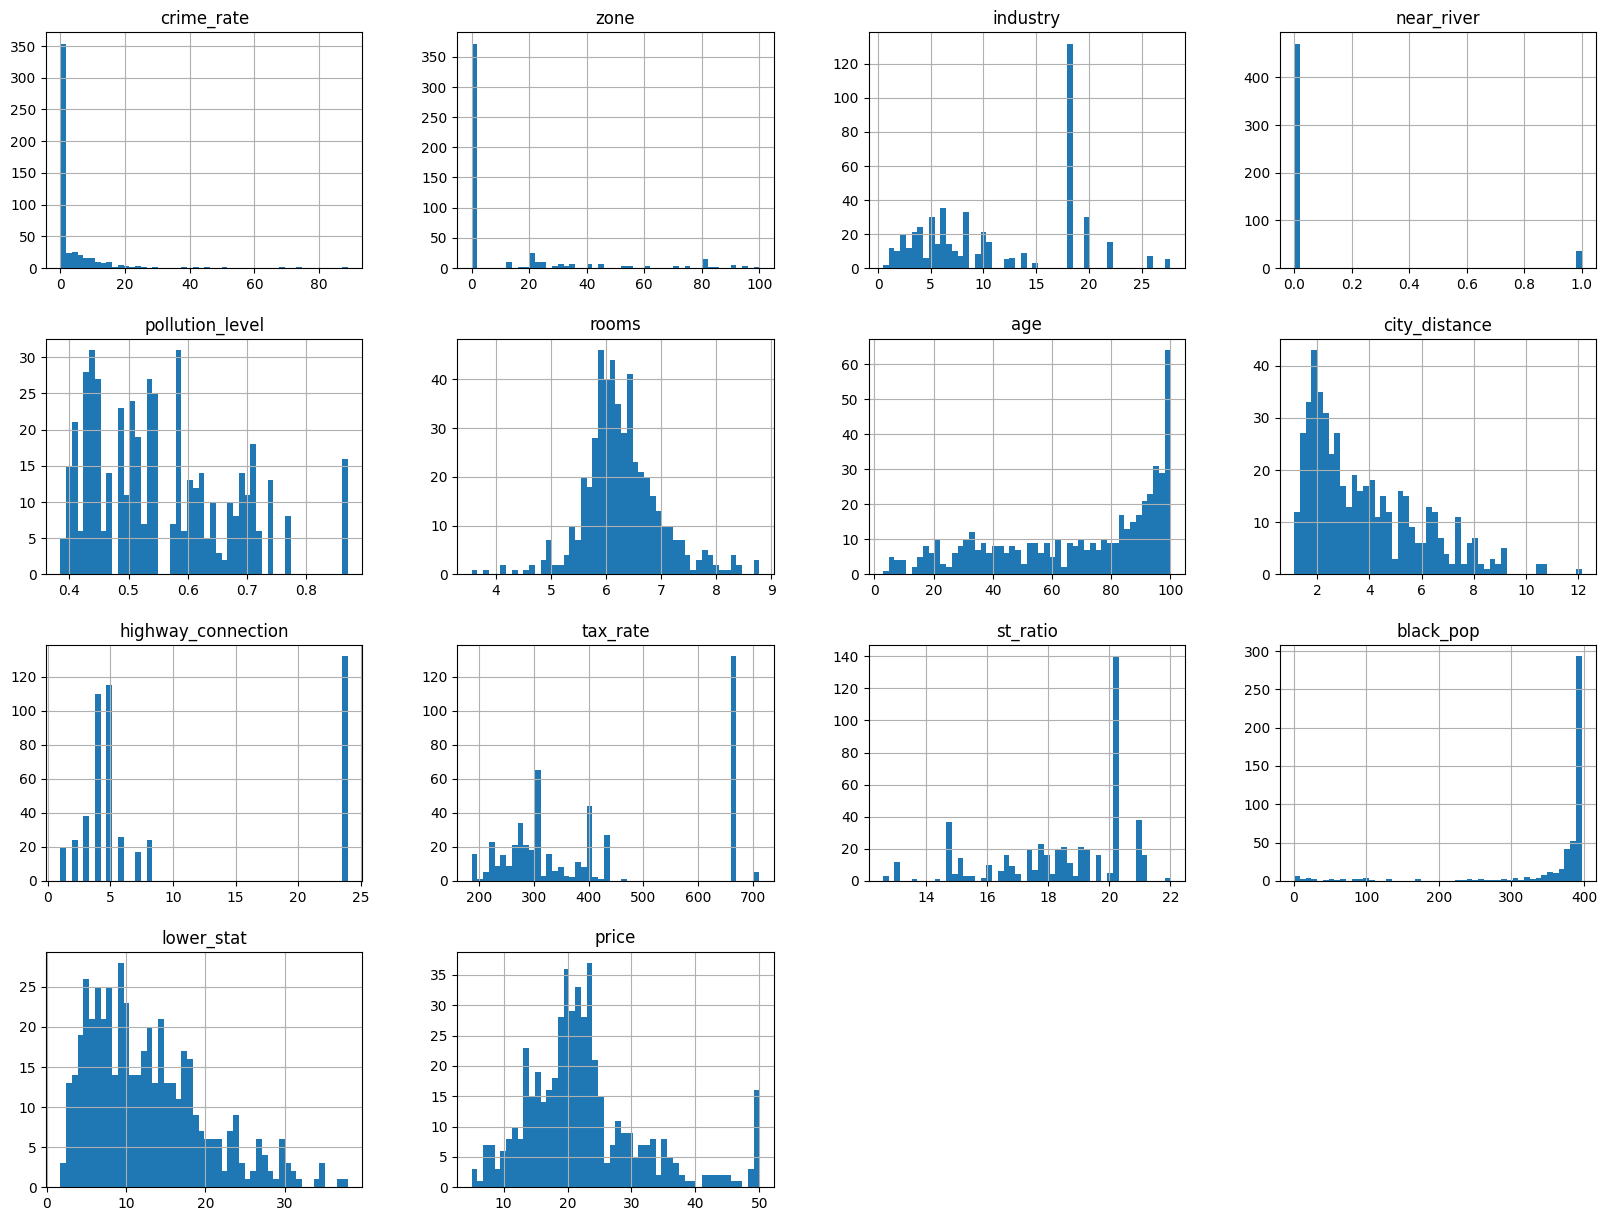

In [34]:
# HIstogram of all data
house_data.hist(bins=50,figsize=(20,15))

C:\Users\Mysterious Soul\AppData\Local\Temp\ipykernel_11320\3090615004.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_data['pollution_level'])


<Axes: xlabel='pollution_level', ylabel='Density'>

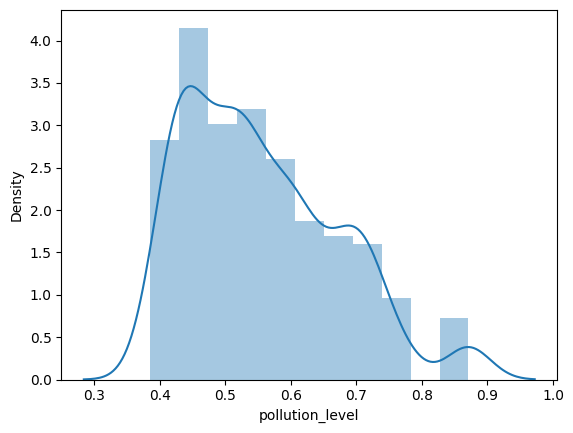

In [35]:
sns.distplot(house_data['pollution_level'])

<Axes: xlabel='crime_rate', ylabel='Count'>

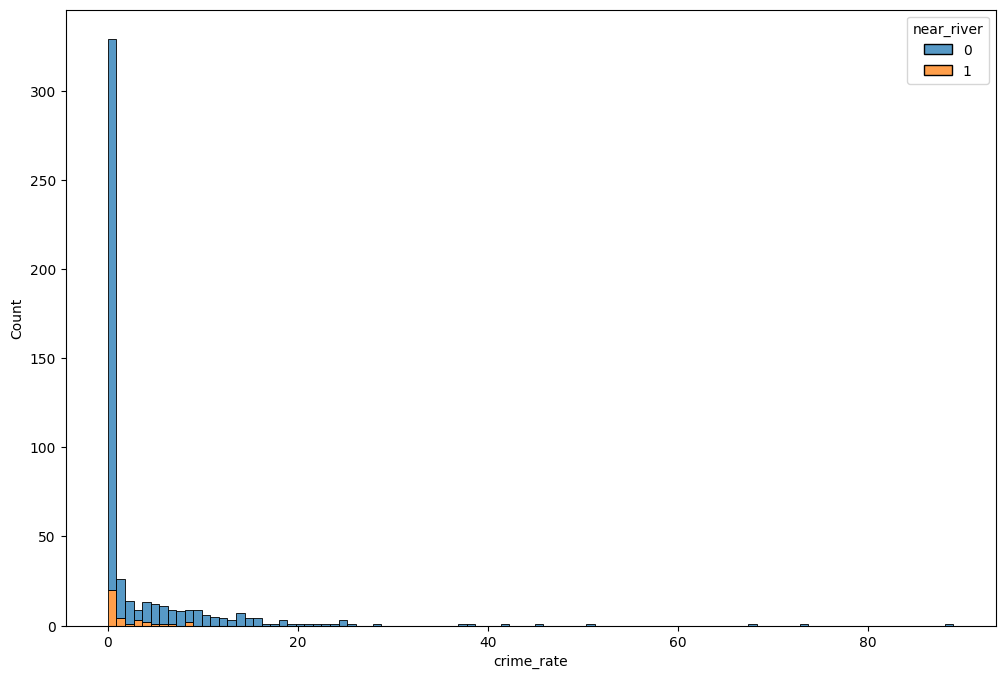

In [36]:
plt.figure(figsize=[12,8])
sns.histplot(x=house_data['crime_rate'],hue=house_data['near_river'],multiple='stack')

<Axes: xlabel='rooms', ylabel='Count'>

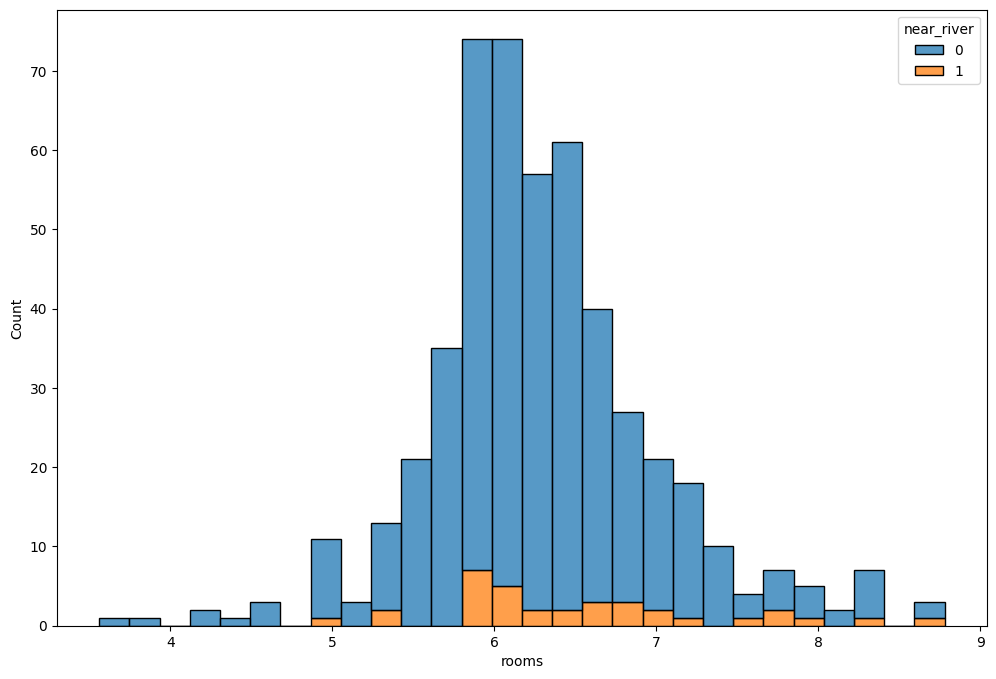

In [37]:
plt.figure(figsize=[12,8])
sns.histplot(x=house_data['rooms'],hue=house_data['near_river'],multiple='stack')

<Axes: xlabel='tax_rate', ylabel='Count'>

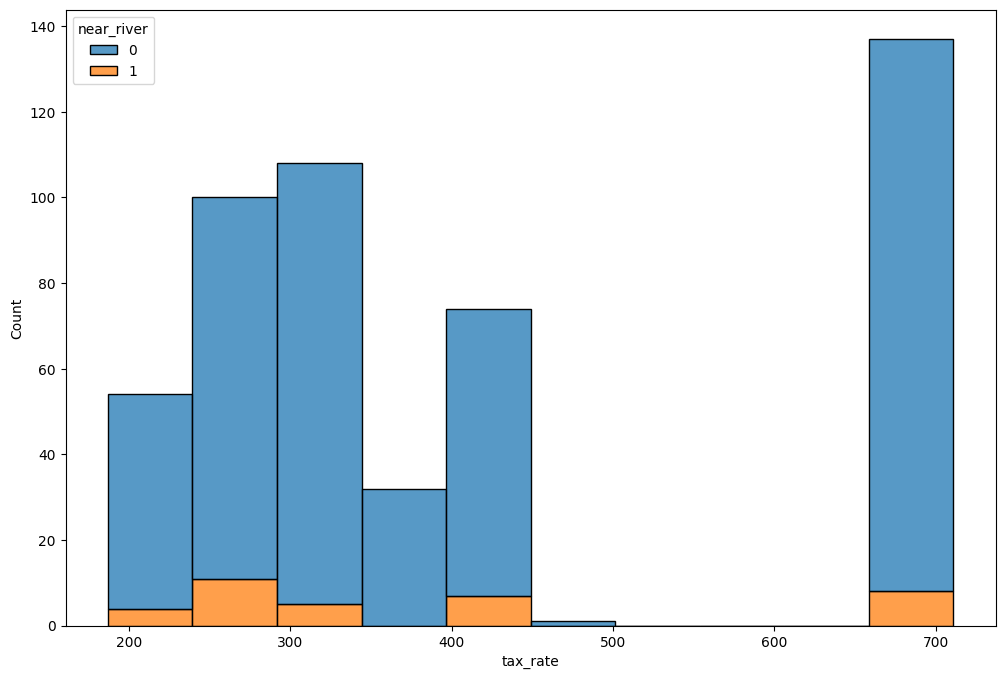

In [38]:
plt.figure(figsize=[12,8])
sns.histplot(x=house_data['tax_rate'],hue=house_data['near_river'],multiple='stack')

<Axes: xlabel='price', ylabel='Count'>

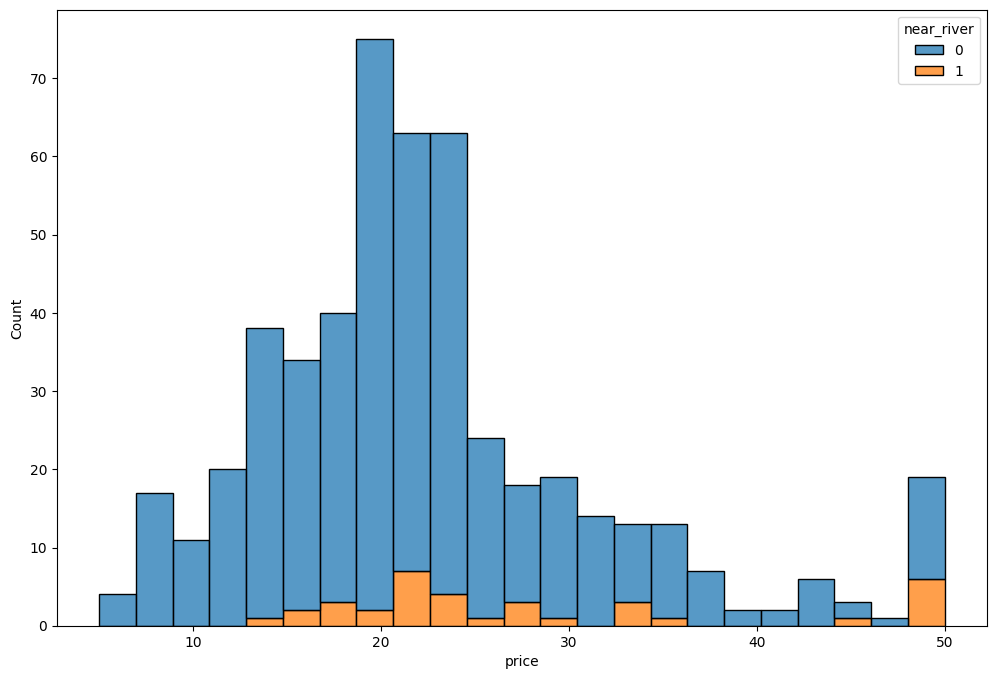

In [39]:
plt.figure(figsize=[12,8])
sns.histplot(x=house_data['price'],hue=house_data['near_river'],multiple='stack')

In [40]:
house_data['near_river'].value_counts()

near_river
0    471
1     35
Name: count, dtype: int64

<Axes: ylabel='price'>

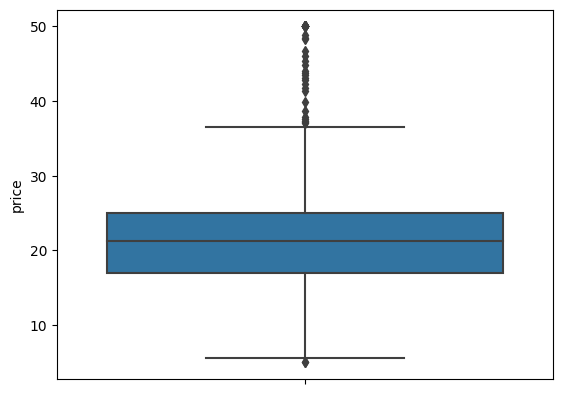

In [41]:
sns.boxplot(y = house_data['price'])

<Axes: ylabel='rooms'>

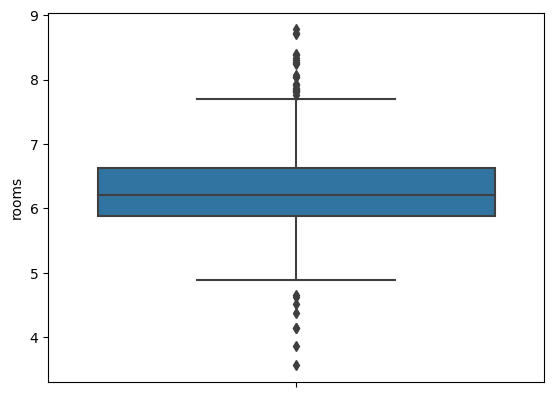

In [42]:
sns.boxplot(y = house_data['rooms'])

C:\Users\Mysterious Soul\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


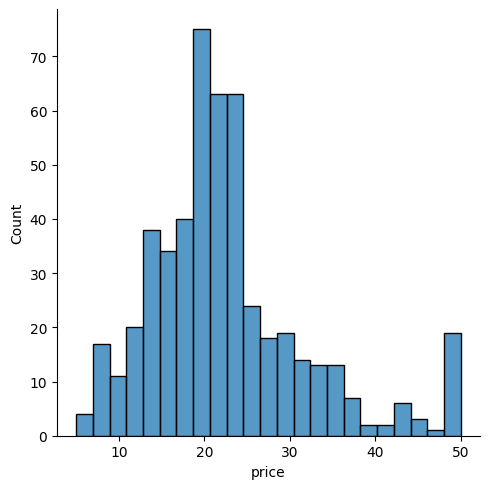

In [43]:
sns.displot(x=house_data['price'])

<Axes: xlabel='lower_stat', ylabel='Count'>

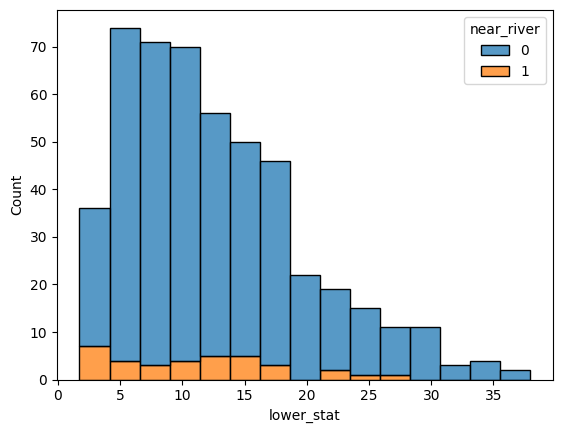

In [44]:
sns.histplot(x=house_data['lower_stat'],hue=house_data['near_river'],multiple='stack')

<Axes: >

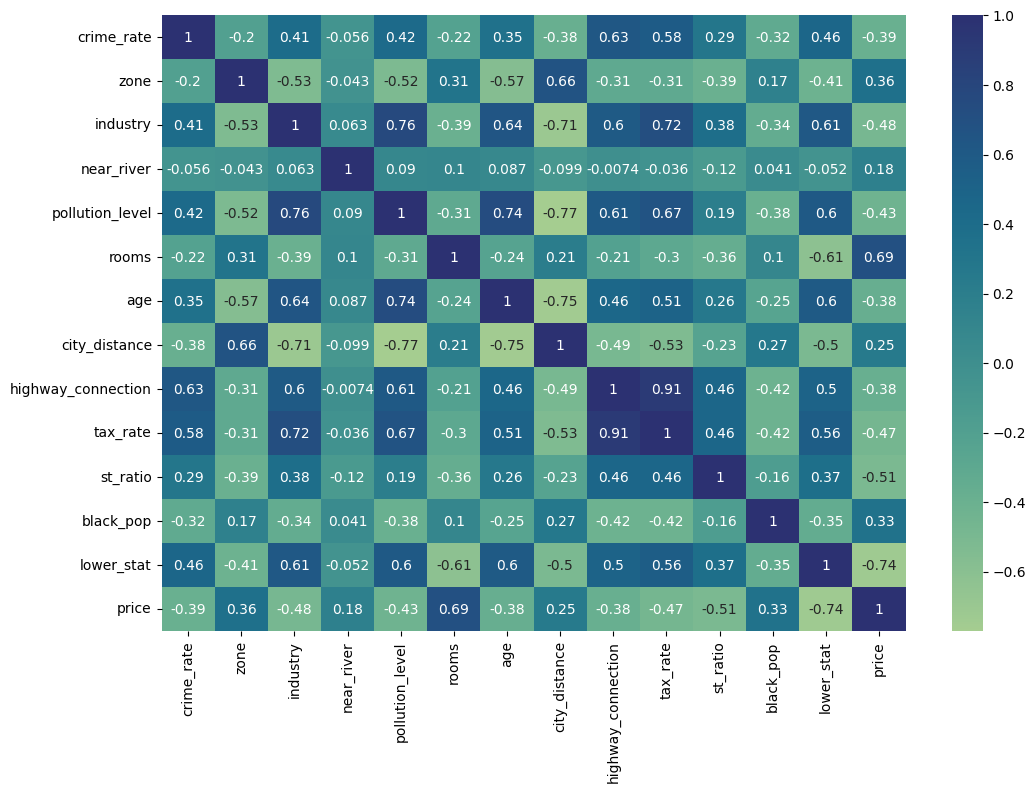

In [45]:
plt.figure(figsize=[12,8])
sns.heatmap(house_data.corr(),annot=True,cmap='crest')

In [46]:
house_data['tax_per_room'] = house_data['tax_rate']/house_data['rooms']
house_data.head()

,crime_rate,zone,industry,near_river,pollution_level,rooms,age,city_distance,highway_connection,tax_rate,st_ratio,black_pop,lower_stat,price,tax_per_room
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [47]:
house_data['pollution_per_ind'] = house_data['pollution_level'] / house_data['industry']
house_data.head()

,crime_rate,zone,industry,near_river,pollution_level,rooms,age,city_distance,highway_connection,tax_rate,st_ratio,black_pop,lower_stat,price,tax_per_room,pollution_per_ind
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011,0.232900
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834,0.066337
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280,0.066337
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350,0.210092
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984,0.210092


<Axes: >

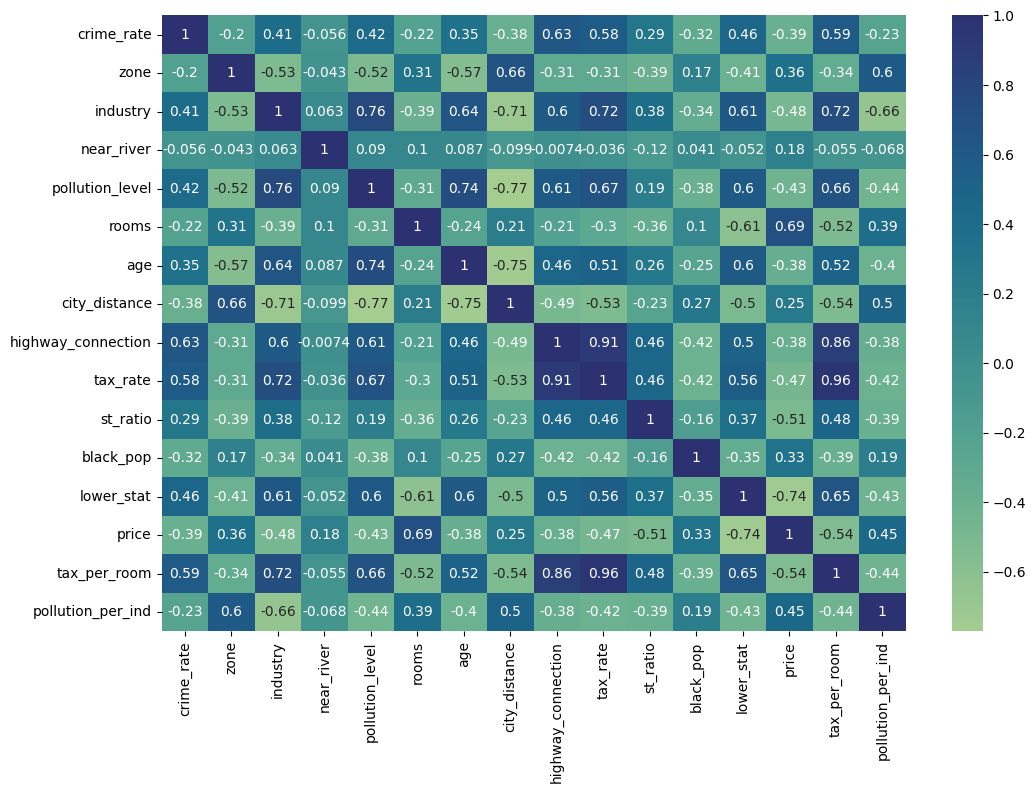

In [48]:
plt.figure(figsize=[12,8])
sns.heatmap(house_data.corr(),annot=True,cmap='crest')

## Data Preprocessing

In [57]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(house_data,test_size=0.2,random_state=100,stratify=house_data['near_river'])

In [58]:
train_data.shape

(404, 16)

In [59]:
train_data.isnull().sum()

crime_rate             0
zone                   0
industry               0
near_river             0
pollution_level        8
rooms                  5
age                    0
city_distance          0
highway_connection     0
tax_rate               0
st_ratio               0
black_pop              8
lower_stat            14
price                  0
tax_per_room           5
pollution_per_ind      8
dtype: int64

In [60]:
train_data['near_river'].value_counts()

near_river
0    376
1     28
Name: count, dtype: int64

In [61]:
test_data.shape

(102, 16)

In [62]:
test_data['near_river'].value_counts()

near_river
0    95
1     7
Name: count, dtype: int64

In [63]:
X_train = train_data.drop(labels='price',axis=1)
y_train = train_data['price']

In [64]:
X_test = test_data.drop(labels='price',axis=1)
y_test = test_data['price']

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])
train_prepreocessed = my_pipeline.fit_transform(X_train)
train_prepreocessed

array([[ 1.38037374, -0.48038793,  0.98862303, ...,  1.3048777 ,
         1.1194763 , -0.55503496],
       [-0.04954161, -0.48038793,  0.98862303, ...,  0.27024661,
         1.56017074, -0.56673879],
       [-0.40207624, -0.48038793, -1.3092975 , ..., -1.057654  ,
        -1.01391108,  1.73574096],
       ...,
       [-0.39550197,  0.0499343 , -0.48799299, ...,  0.01717138,
        -0.4679869 , -0.16432212],
       [-0.40441504,  3.33793211, -1.19526752, ..., -0.66464306,
        -0.83357356,  0.73729467],
       [-0.40034155, -0.48038793,  0.09803448, ..., -0.48153569,
        -0.69398321, -0.40994686]])

In [66]:
test_prepreocessed = my_pipeline.fit_transform(X_test)
test_prepreocessed

array([[ 1.14980985, -0.519308  ,  1.13535282, ...,  0.08411385,
         1.6428592 , -0.75113319],
       [ 0.17074371, -0.519308  ,  1.13535282, ..., -1.21662745,
         2.17343867, -0.73604455],
       [-0.48266085,  0.60722148, -0.8505839 , ..., -0.46786124,
        -0.86120153,  0.12250279],
       ...,
       [ 0.61625702, -0.519308  ,  1.13535282, ...,  0.8940773 ,
         1.82902851, -0.67480241],
       [ 0.46545029, -0.519308  ,  1.13535282, ...,  1.18686408,
         1.35289448, -0.75113319],
       [ 0.75802072, -0.519308  ,  1.13535282, ...,  1.2240624 ,
         1.72154549, -0.67480241]])

## Creating and Training Model

In [67]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [68]:
model.fit(train_prepreocessed,y_train)

LinearRegression()

In [69]:
model.coef_

array([ -1.18339238,   0.39065934,   1.29190971,   0.80508342,
        -1.21844476,   6.64168582,  -0.57295712,  -2.33145079,
         2.30907758, -14.01729675,  -1.69533631,   1.0075003 ,
        -3.58843005,  13.49417057,   0.79225897])

In [70]:
model.intercept_

22.732673267326728

In [71]:
model.score(train_prepreocessed,y_train)

0.8196373126993026

In [72]:
y_train_pred= model.predict(train_prepreocessed)

C:\Users\Mysterious Soul\AppData\Local\Temp\ipykernel_11320\3031815612.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='Actual Charges')
C:\Users\Mysterious Soul\AppData\Local\Temp\ipykernel_11320\3031815612.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_pred, lab

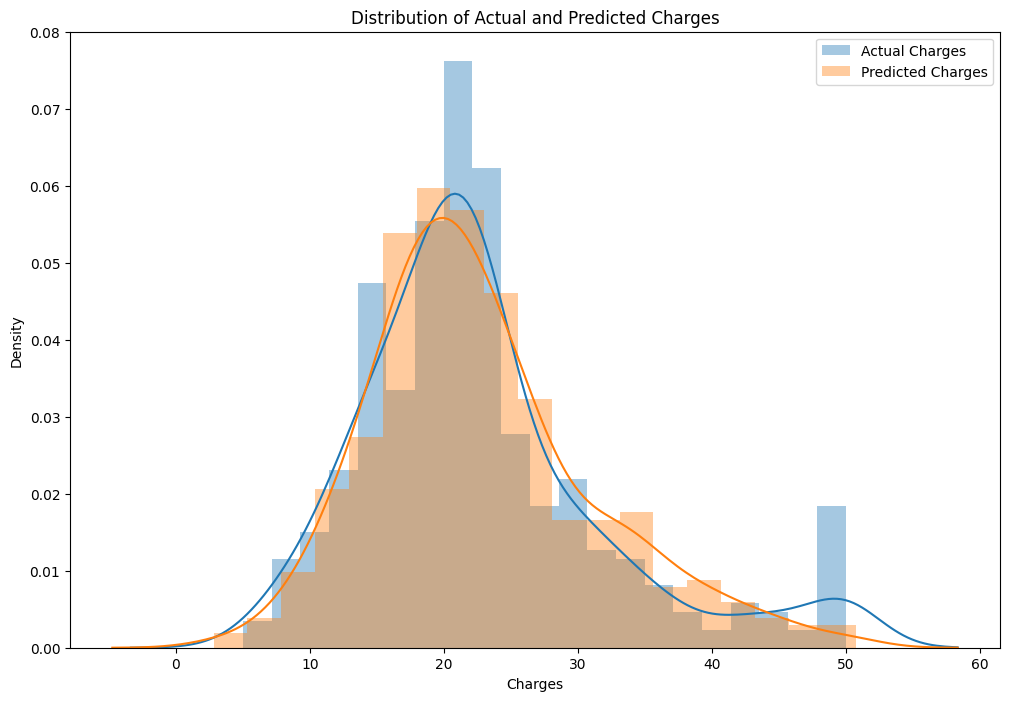

In [73]:

plt.figure(figsize=[12, 8])
sns.distplot(y_train, label='Actual Charges')
sns.distplot(y_train_pred, label='Predicted Charges')

plt.xlabel('Charges')
plt.ylabel('Density')
plt.title('Distribution of Actual and Predicted Charges')

plt.legend()

plt.show()


In [74]:
from sklearn.metrics import mean_squared_error
y_train_pred = model.predict(train_prepreocessed)

MSE = mean_squared_error(y_train, y_train_pred)
RMSE = np.sqrt(MSE)
RMSE


3.9243908305751454

In [75]:
y_test_pred = model.predict(test_prepreocessed)

C:\Users\Mysterious Soul\AppData\Local\Temp\ipykernel_11320\4275923100.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Charges')
C:\Users\Mysterious Soul\AppData\Local\Temp\ipykernel_11320\4275923100.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred, label

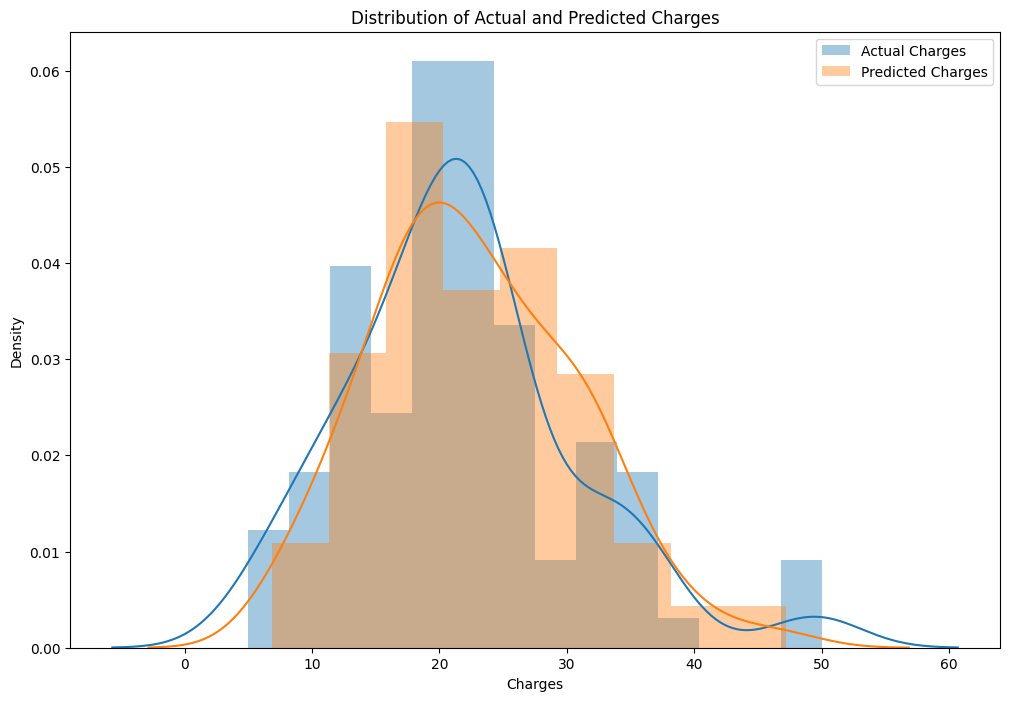

In [76]:
plt.figure(figsize=[12, 8])
sns.distplot(y_test, label='Actual Charges')
sns.distplot(y_test_pred, label='Predicted Charges')

plt.xlabel('Charges')
plt.ylabel('Density')
plt.title('Distribution of Actual and Predicted Charges')

plt.legend()

plt.show()


In [77]:
from sklearn.metrics import mean_squared_error
y_train_pred = model.predict(test_prepreocessed)

MSE = mean_squared_error(y_test, y_test_pred)
RMSE = np.sqrt(MSE)
RMSE


4.567555867416636

In [78]:

model.score(test_prepreocessed,y_test)

0.7385581310748774

## Decision Tree

In [81]:
from sklearn.tree import DecisionTreeRegressor
decsiontree = DecisionTreeRegressor()

In [82]:
decsiontree.fit(train_prepreocessed,y_train)

DecisionTreeRegressor()

## Evaluation 

In [83]:
decsiontree.score(train_prepreocessed,y_train)

1.0

In [84]:
y_test_pred = decsiontree.predict(test_prepreocessed)

C:\Users\Mysterious Soul\AppData\Local\Temp\ipykernel_11320\4275923100.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Charges')
C:\Users\Mysterious Soul\AppData\Local\Temp\ipykernel_11320\4275923100.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred, label

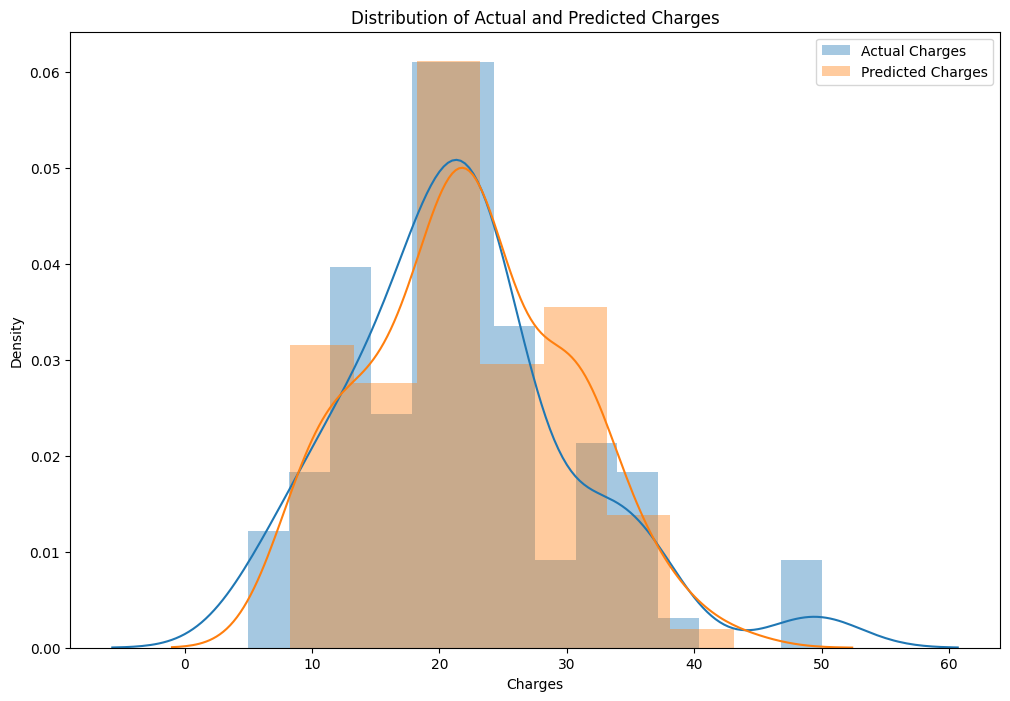

In [85]:
plt.figure(figsize=[12, 8])
sns.distplot(y_test, label='Actual Charges')
sns.distplot(y_test_pred, label='Predicted Charges')

plt.xlabel('Charges')
plt.ylabel('Density')
plt.title('Distribution of Actual and Predicted Charges')

plt.legend()

plt.show()


In [86]:
decsiontree.score(test_prepreocessed,y_test)

0.6671207152537199

## Import Model

In [87]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [88]:
from joblib import dump,load


In [89]:
dump(model,'House_Price_Pred.joblib')

['House_Price_Pred.joblib']

In [90]:
model = load('House_Price_Pred.joblib')
model

LinearRegression()